## Installations and Requirements

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

# Imports

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Read Image

### Read image.jpg from the folder (using OpenCV)

In [5]:
image_bgr = cv2.imread('./image.jpg')

### Convert it to Gray (using OpenCV)

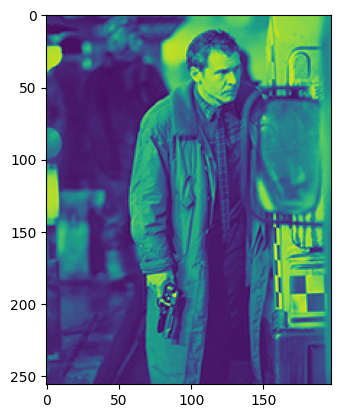

In [6]:
plt.imshow(image := cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY))

# Descriptor Representations & Operations

### Implement HOG Descriptor (Using OpenCV)

In [10]:
def compute_hog_descriptor(image):

    # Create a HOG descriptor
    hog = cv2.HOGDescriptor()

    # Compute HOG features
    hog_features = hog.compute(image)

    return hog_features

def visualize_hog_descriptor(hog_features, image):
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    # Visualize HOG features
    plt.subplot(1, 2, 2)
    plt.plot(hog_features)
    plt.title('HOG Descriptor')
    plt.show()

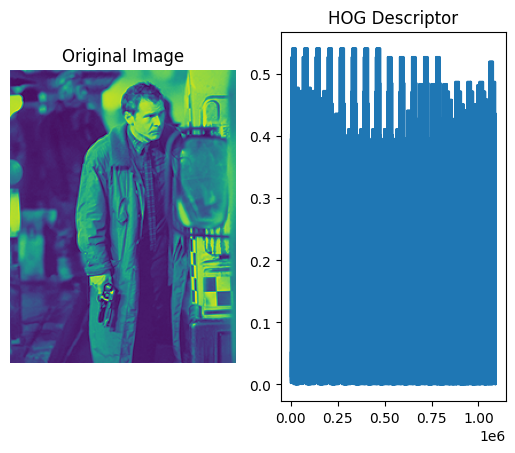

In [11]:
hog_features = compute_hog_descriptor(image)
visualize_hog_descriptor(hog_features, image)

### Implement HOG Descriptor (From Scratch Without OpenCV)

In [16]:
def calculate_gradients(gray_image):
    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    return gradient_x, gradient_y

def calculate_magnitude_and_orientation(gradient_x, gradient_y):
    # Calculate gradient magnitude and orientation
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    orientation = np.arctan2(gradient_y, gradient_x)

    return magnitude, orientation

def calculate_histogram(orientation, magnitude, bins=9):
    # Calculate histogram of orientations
    histogram, bin_edges = np.histogram(orientation, bins=bins, range=(-np.pi, np.pi), weights=magnitude)
    return histogram

def block_normalization(histogram, block_size):
    # Perform block normalization
    block_rows, block_cols = block_size
    normalized_histogram = histogram.reshape(block_rows, block_cols, -1).sum(axis=(0, 1))
    normalized_histogram /= np.linalg.norm(normalized_histogram)

    return normalized_histogram

def hog_descriptor(image, cell_size=(8, 8), block_size=(2, 2), bins=9):
    # Calculate gradients
    gradient_x, gradient_y = calculate_gradients(image)

    # Calculate magnitude and orientation
    magnitude, orientation = calculate_magnitude_and_orientation(gradient_x, gradient_y)

    # Define the size of cells and blocks
    cell_rows, cell_cols = cell_size
    block_rows, block_cols = block_size

    # Calculate the number of cells and blocks
    num_cells_row = image.shape[0] // cell_rows
    num_cells_col = image.shape[1] // cell_cols
    num_blocks_row = num_cells_row - block_rows + 1
    num_blocks_col = num_cells_col - block_cols + 1

    # Initialize the HOG descriptor
    hog_descriptor_vector = np.zeros((num_blocks_row, num_blocks_col, block_rows, block_cols, bins))

    # Iterate over blocks
    for i in range(num_blocks_row):
        for j in range(num_blocks_col):
            block_orientation = orientation[i * cell_rows:(i + block_rows) * cell_rows,
                                           j * cell_cols:(j + block_cols) * cell_cols]

            block_magnitude = magnitude[i * cell_rows:(i + block_rows) * cell_rows,
                                         j * cell_cols:(j + block_cols) * cell_cols]

            # Calculate histogram for the block
            block_histogram = calculate_histogram(block_orientation, block_magnitude, bins)

            # Perform block normalization
            normalized_block_histogram = block_normalization(block_histogram, block_size)

            # Assign the normalized block histogram to the HOG descriptor
            hog_descriptor_vector[i, j, :, :, :] = normalized_block_histogram


    # Flatten the HOG descriptor
    hog_descriptor_vector = hog_descriptor_vector.flatten()

    return hog_descriptor_vector

def visualize_hog_descriptor(hog_descriptor_vector, block_size=(2, 2), bins=9):
    # Visualize the HOG descriptor
    plt.bar(np.arange(len(hog_descriptor_vector)), hog_descriptor_vector)
    plt.title('HOG Descriptor')
    plt.show()

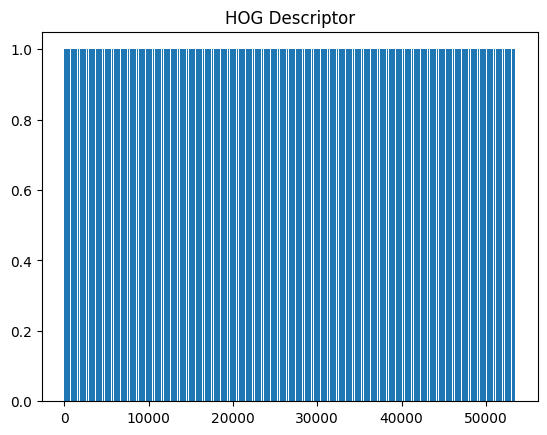

In [19]:
hog_vector = hog_descriptor(image, block_size=(3, 3))

# Visualize HOG descriptor
visualize_hog_descriptor(hog_vector)